# <span style='font-family:Georgia'> <span style='color:blue'> Deep Learning Tutorial Session - 23rd Feb 2024

### Agenda - 
- Installation in Local Machine
- Tensorflow vs Pytorch
- Exploring MNIST Dataset
- Implementing a Simple ANN for classifying digits from the MNIST Dataset  
- How to run code in Kaggle and Colab

---

## <span style='font-family:Georgia'> <span style='color:green'> Installation in Local Machine

### Tensorflow : https://www.tensorflow.org/install/pip#windows-native
### Pytorch : https://pytorch.org/get-started/locally/

---

## <span style='font-family:Georgia'> <span style='color:green'> TensorFlow vs. PyTorch: A Comparative Guide for Deep Learning Tutorials

Choosing the right deep learning framework is crucial for your tutorial. Here's a breakdown of TensorFlow and PyTorch, along with code samples:

**Key Differences:**

| Feature        | TensorFlow                                     | PyTorch                                    |
|----------------|----------------------------------------------|----------------------------------------------|
| Syntax         | Imperative, static computational graph   | Declarative, dynamic computational graph  |
| Learning Curve  | Steeper, requires understanding of dataflow      | Easier, intuitive and Pythonic         |
| Performance    | Generally faster for large models, lower memory usage | Potentially faster for small models, better debugging |
| Production     | Wide range of deployment options (TF Serving, TFLite) | Requires integration with web frameworks         |
| Community     | Larger, more established                        | Active, research-oriented community             |
| Pre-trained Models | Extensive library (TensorFlow Hub)             | Smaller library (PyTorch Hub)                 |

**When to Use Which:**

- **TensorFlow:**
    - Production deep learning (large models)
    - Advanced customization/low-level control
    - Existing TensorFlow knowledge/preference
- **PyTorch:**
    - Rapid prototyping/experimentation
    - Research/development (dynamic graph)
    - User preference for Pythonic syntax/flexibility

**Code Samples:**

**TensorFlow:**

In [1]:
import tensorflow as tf

# Simple neural network
inputs = tf.keras.Input(shape=(784,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32)

NameError: name 'x_train' is not defined

**PyTorch:**

In [ ]:
import torch

# Simple neural network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(784, 64)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(64, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = Net()

# Loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Train
for epoch in range(5):
    for i, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

---

## <span style='font-family:Georgia'> <span style='color:green'> Exploring MNIST Dataset

![mnist.png](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/mnist.png)

MNIST (Modified National Institute of Standards and Technology) is a well-known dataset used in Computer Vision that was built by Yann Le Cun et al. It is composed of images that are handwritten digits (0-9), split into a training set of 50,000 images and a test set of 10,000, where each image is 28 x 28 pixels in width and height.

In [1]:
# Some common imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


In [3]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [4]:
np.set_printoptions(linewidth=150)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [11]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='summer')
    width, height = img.shape
    print("width",width)
    print("height",height)
    thresh = img.max()/2.5
    print("treshold",thresh)
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

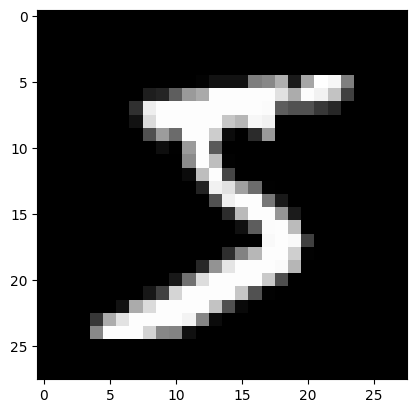

In [6]:
plt.imshow(X_train[0],"gray")
plt.show()


width 28
height 28
treshold 102.0


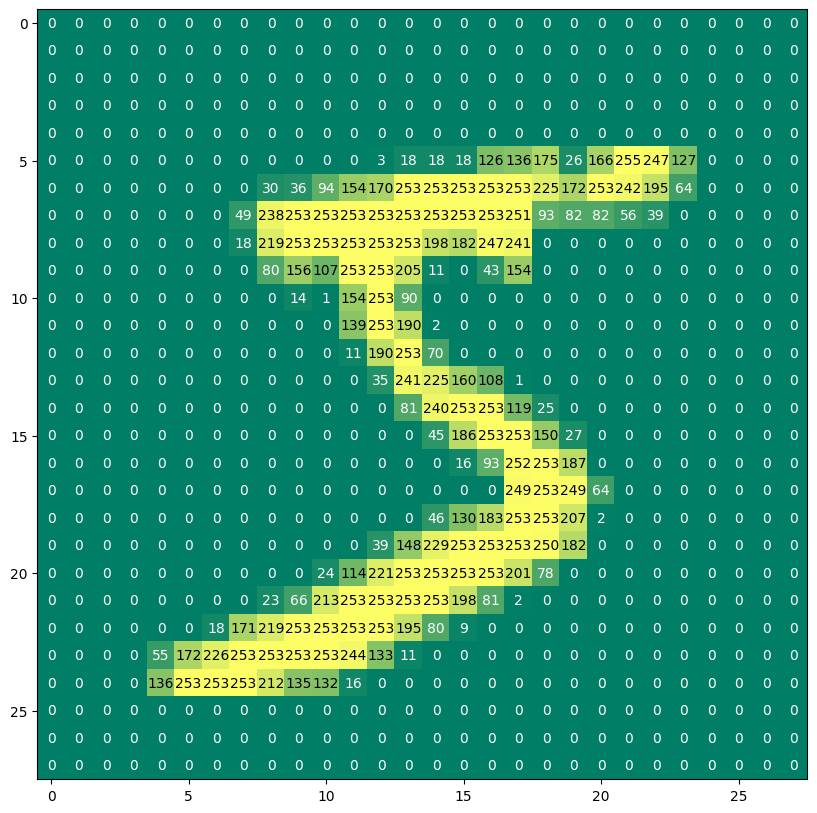

In [12]:
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)
plt.show()

In [ ]:
y_train[0]

---

## <span style='font-family:Georgia'> <span style='color:green'> Implementing a Simple ANN

#### Steps -
- Flatten the input image dimensions to 1D (width pixels x height pixels)
- Normalize the image pixel values (divide by 255)
- One-Hot Encode the categorical column
- Build a model architecture (Sequential) with Dense layers(Fully connected layers)
- Train the model and make predictions
    

![ann.gif](https://miro.medium.com/v2/resize:fit:720/format:webp/0*u5-PcKYVfUE5s2by.gif)

In [13]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
import keras
from tensorflow.keras import layers
from keras.utils import to_categorical

In [ ]:
# Flattening the images from the 28x28 pixels to 1D 787 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [16]:
# normalizing the data to help with the training
X_train /= 255.0
X_test /= 255.0

UFuncTypeError: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'

In [ ]:
print(y_train[0])

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

In [ ]:
print(Y_train[0])

In [ ]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(24, activation='relu'),  
    layers.Dense(10,activation='sigmoid'),
])

model.summary()

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

![loss.png](https://miro.medium.com/v2/resize:fit:640/format:webp/0*vteMfTAGWsIZSaOW)

where, yi is the original label and yi cap is the predicted label

In [ ]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=100, epochs=30)

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14,3))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.show()

In [ ]:
test_loss_digit, test_acc_digit = model.evaluate(X_test, Y_test)

In [ ]:
print("Testing Accuracy : ", round(test_acc_digit,4)*100, "%")

In [ ]:
# plot the confusion matrix for the testing dataset
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)

# Convert the predictions and true labels to classes (assuming one-hot encoding for true labels)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# take one random sample from test and show the predicted vs actual
import random
i = random.randint(1,10000)
print("Random number is ", i)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.show()
print("Actual number is ", y_test[i])
print("Predicted number is ", model.predict(X_test[i].reshape(1,784)).argmax())

---

In [ ]:
import cv2

img = cv2.imread('/kaggle/input/tutorial-23-1/blank_0.png',0)

plt.imshow(img,"gray")
plt.show()

In [ ]:
print("Predicted number is ", model.predict(img.reshape(1,784)).argmax())